# DOS calculations on FCC Si at equilibrium.
## Basic energy information and preprocessing for DOS

In [16]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Outcar, Oszicar
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Get the basic objects
OutFull = Outcar("OUTCAR")
print("Final energy:", OutFull.final_energy)
print("Fermi energy", OutFull.efermi)
print("Stopped by user:", OutFull.is_stopped)

Final energy: -4.8663654
Fermi energy 9.895
Stopped by user: False


In [18]:
# Other stuff
OutBasics = Oszicar("OSZICAR")
# print("Complete energy array:\n", OutBasics.all_energies)

In [19]:
energyMatrix = OutBasics.all_energies
indexer = []
for i in range(0, len(energyMatrix)):
    indexer.append(list(range(0, len(energyMatrix[i]))))
    indexer[i] = tuple(indexer[i])
indexer = tuple(indexer)
# Convert everything to tuples so we can pair them with energyMatrix elements in a moment
print(indexer)

((0, 1, 2, 3, 4, 5, 6, 7, 8),)


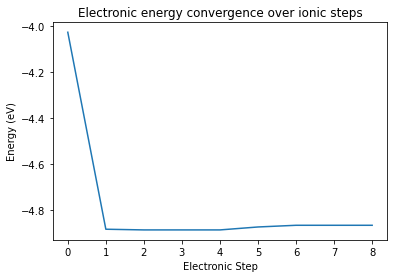

In [20]:
# Plotting
plt.xlabel("Electronic Step")
plt.ylabel("Energy (eV)")
plt.title("Electronic energy convergence over ionic steps")
for i in range(0, len(energyMatrix)):
    plt.plot(indexer[i], energyMatrix[i], label='Step {}'.format(i+1))
# plt.legend()

## DOS

In [21]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
dos = run.tdos

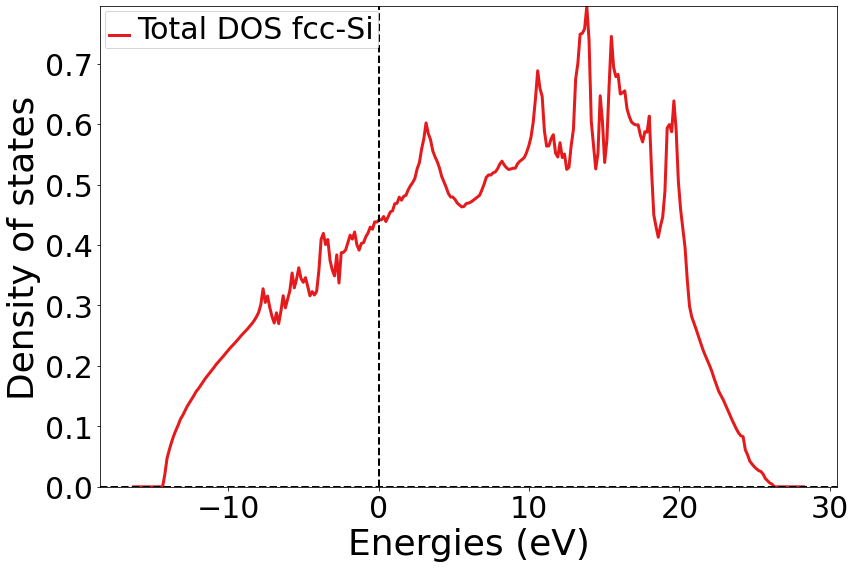

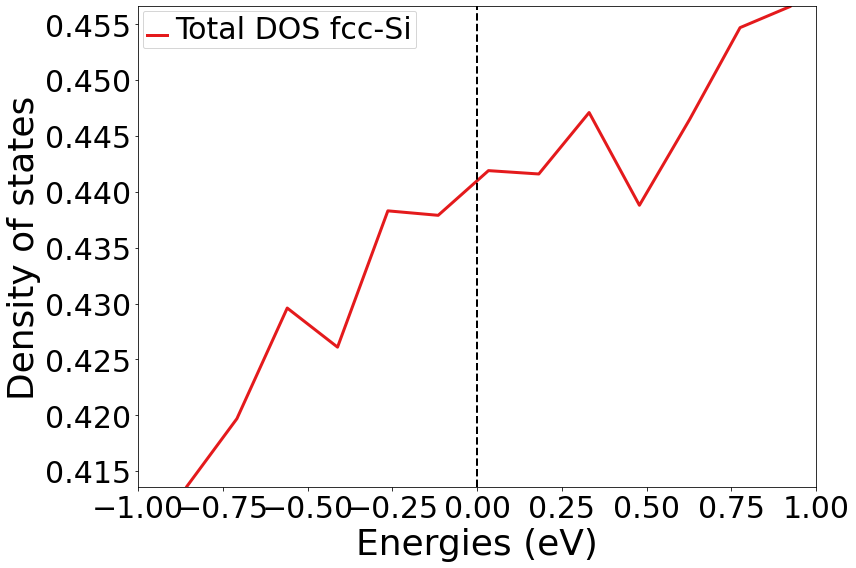

In [23]:
dosplot = DosPlotter()
dosplot.add_dos("Total DOS fcc-Si", dos)
dosplot.save_plot("fcc-Si_DOS_wide.png", "png")
dosplot.save_plot("fcc-Si_DOS_narrow.png", "png", [-1, 1])